In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task1

In [24]:
# Read the data
df = pd.read_csv("svm_data.csv",delimiter=";",index_col=0)
df.head()

,xi1,xi2,yi
xi,,,
x1,3.5,4.25,1.0
x2,4.0,3.00,1.0
x3,4.0,4.00,1.0
x4,4.5,1.75,1.0
x5,4.9,4.50,1.0


### a）

In [28]:
# Features of support vectors
support_vectors = np.array([
    [3.50, 4.25],
    [4.00, 3.00],
    [4.50, 1.75],
    [2.00, 2.00],
    [2.50, 0.75]
])

# Lagrange multipliers for support vectors
alphas = np.array([0.0437, 0.2162, 0.1427, 0.3589, 0.0437])

# Labels for support vectors
y_sv = np.array([1.0, 1.0, 1.0, -1.0, -1.0])

# Calculate the weight vector 'w'
w = np.sum(alphas[:, np.newaxis] * y_sv[:, np.newaxis] * support_vectors, axis=0)
print('Weight vector (w):', w)

# Calculate the bias term 'b' using all support vectors
for i in range(5):
  b = y_sv[i] - np.dot(w, support_vectors[i])
  print('Bias term (b):', b)

Weight vector (w): [0.83285  0.333475]
Bias term (b): -3.33224375
Bias term (b): -3.3318249999999994
Bias term (b): -3.331406249999999
Bias term (b): -3.3326499999999997
Bias term (b): -3.3322312499999995


### b)

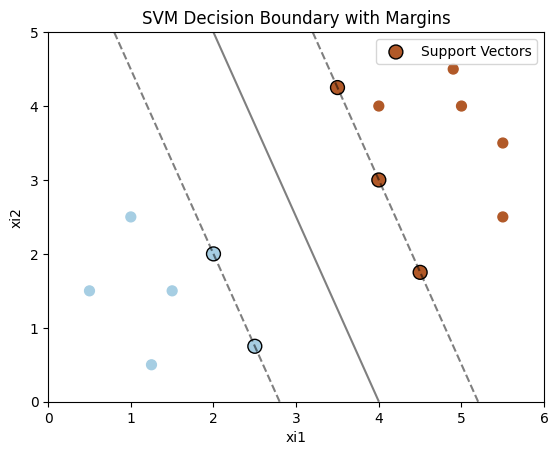

In [32]:
# Plot the dataset points
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c=y_sv, cmap=plt.cm.Paired, s=100, marker='o', edgecolors='k', label='Support Vectors')

# Extract the relevant columns from the DataFrame for plotting
xi1_values = df['xi1'].values
xi2_values = df['xi2'].values
yi_values = df['yi'].values

# Plot the remaining data points
plt.scatter(xi1_values, xi2_values, c=yi_values, cmap=plt.cm.Paired, s=50)

# Plot the hyperplane
xx, yy = np.meshgrid(np.linspace(0, 6, 100), np.linspace(0, 5, 100))
zz = w[0] * xx + w[1] * yy + b
plt.contour(xx, yy, zz, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot the margins
margin = 1 / np.sqrt(np.sum(w ** 2))

plt.xlabel('xi1')
plt.ylabel('xi2')
plt.title('SVM Decision Boundary with Margins')
plt.legend()
plt.show()

### c) No points are misclassified by the present hyperplane.

## Task2

In [33]:
from generator import data_generator

In [34]:
# Define the (intercept, slope) values
parameters_list = [(-0.1, 0.7), (0.1, 2), (0.75, -0.2), (1, -1)]

# Generate datasets for each set of parameters
datasets = []
for intercept, slope in parameters_list:
    data = data_generator(intercept, slope, size=100)
    X = [(x, y) for x, y, _ in data]
    y = [label for _, _, label in data]
    datasets.append((X, y))

# Display or use the generated datasets as needed
for i, (X, y) in enumerate(datasets):
    print(f"Dataset {i+1} - Intercept: {parameters_list[i][0]}, Slope: {parameters_list[i][1]}")

Dataset 1 - Intercept: -0.1, Slope: 0.7
Dataset 2 - Intercept: 0.1, Slope: 2
Dataset 3 - Intercept: 0.75, Slope: -0.2
Dataset 4 - Intercept: 1, Slope: -1


Intercept: -0.1, Slope: 0.7
Learned Coefficients: {'alpha': array([-5.87155282e-14, -1.14066394e-15, -3.98578419e-14, -1.29588151e-14,
       -3.88551356e-13, -1.70816126e-13,  6.92813202e-15, -5.70504976e-14,
        9.05724764e+00, -2.05817280e-14, -1.48083808e-13, -3.60153179e-13,
       -3.93517431e-14, -3.51050867e-13,  1.61244333e-16, -1.17764426e-14,
       -8.88519840e-14, -5.85005602e-15, -1.63816294e-14, -1.97367464e-12,
       -2.63443494e-15, -7.27195856e-14, -2.34922112e-14,  6.20166888e+01,
       -2.87733008e-13,  2.15789858e-15, -7.03710965e-14, -4.36570085e-14,
       -3.48764223e-14,  1.02370990e-15, -1.64666495e-14, -2.20668409e-14,
       -4.83735157e-15, -1.58570942e-12, -5.77293277e-13, -1.86205241e-13,
       -5.88132730e-14,  8.19033016e-15,  7.84184454e-15, -1.32358299e-15,
       -2.32916849e-14, -1.32966784e-14, -3.51533205e-15, -1.48215685e-15,
       -6.60595461e-14, -3.48187837e-14, -2.40525418e-14, -8.94817614e-15,
       -2.89515607e-14, -5.39417168e-15,

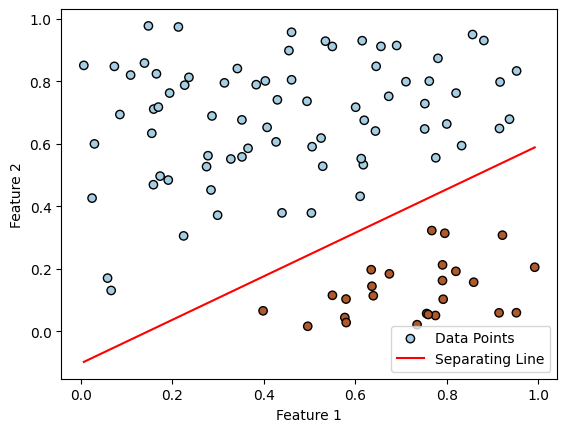

Intercept: 0.1, Slope: 2
Learned Coefficients: {'alpha': array([-4.57731996e-15,  1.28354831e-13,  2.94412783e-13,  6.91504875e-14,
        1.08171691e-13, -5.91314240e-14, -9.99372325e-14, -4.54117365e-14,
        4.80434871e-14,  6.08104970e+01,  5.21757824e-15,  2.45297625e-14,
        7.03033092e-14, -5.49771662e-14,  6.30462620e-15, -2.14900836e-13,
       -2.12811281e-14,  3.96513479e-14,  1.23387328e-13, -2.63612973e-14,
        5.73365504e-14,  7.42950503e-14,  9.54898804e-15,  3.46848050e-15,
        3.35845965e-14,  1.68397801e-14, -5.72896744e-14,  1.05055623e-13,
       -2.49372010e-14,  8.55839397e-14, -1.07486232e-13,  2.02602270e-12,
        3.23384594e-14, -4.93480803e-15,  1.27006175e-13,  3.02357093e-14,
        3.24234355e+01,  7.38806927e-14,  2.02756817e-14,  3.53307203e-14,
       -9.27277687e-14, -1.46965660e-14,  2.62379776e-13,  9.32339325e+01,
       -8.14585705e-14,  3.31509627e-12, -2.95158244e-14, -1.39098028e-14,
        6.26013081e-13,  5.45634659e-14,  2

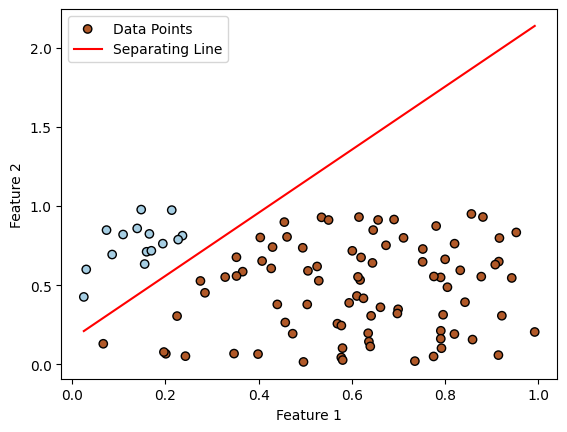

Intercept: 0.75, Slope: -0.2
Learned Coefficients: {'alpha': array([-1.10184583e-12, -8.44087716e-13,  1.02170418e-14,  1.84669516e-14,
       -4.09347676e-15, -4.10740335e-14,  2.31192128e-14, -2.25350868e-13,
       -1.74523306e-14,  2.47559297e-14, -1.65520562e-14, -1.16822027e-15,
       -4.90549698e-14, -3.80686894e-14, -1.39112849e-14,  2.63016232e-14,
       -5.91367289e-14, -8.91725358e-12, -1.72467946e-14, -1.57019565e-14,
       -9.19345968e-15, -9.75650692e-13, -2.70528765e-14, -3.41793019e-15,
       -1.79273877e-12, -6.07113324e-13, -1.39460306e-12,  6.84090405e-15,
       -4.44965626e-14, -4.04049587e-14,  2.60624928e-16, -1.81800822e-14,
       -2.31895331e-14, -4.03797891e-14,  2.16192708e-14, -1.03921725e-13,
        2.04447110e-14,  1.21300525e-14,  1.48016521e-14, -7.91542526e-13,
        1.68001415e-14, -1.04153553e-14,  1.17196882e-15,  2.23909713e-14,
       -1.78422689e-14, -1.84458519e-13, -5.35792999e-13, -1.16431070e-13,
       -4.83068051e-13,  1.98122228e-14

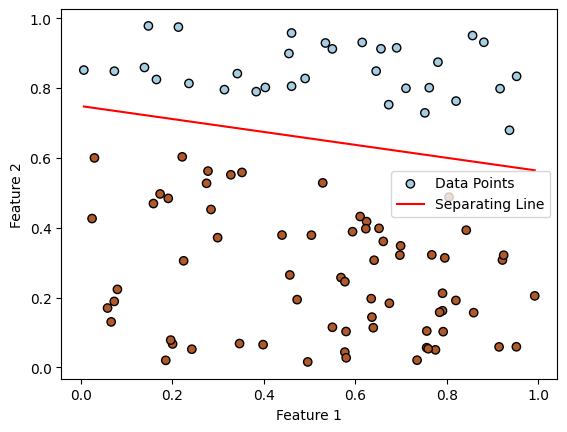

Intercept: 1, Slope: -1
Learned Coefficients: {'alpha': array([-1.26578690e-12, -6.99432026e-13,  7.37314180e-14, -9.19562267e-13,
       -1.16473898e-14, -2.17208032e-14,  2.62602679e-14, -3.07322043e-14,
       -3.83171909e-14,  2.35704677e-15,  8.57718777e+01, -1.71286797e-14,
        2.46256189e-15, -6.39262291e-14, -2.02421962e-12,  1.43390591e-14,
       -1.11453521e-13, -3.22659891e-13, -1.01288264e-13, -5.24711257e-14,
       -1.29574692e-12, -3.98446776e-14, -4.46490434e-14, -8.96615686e-15,
       -2.65880372e-13, -6.43591630e-14, -8.22766357e-14,  2.28941855e-14,
       -1.91389591e-13, -1.93696530e-14, -1.82196007e-13, -9.49803217e-14,
       -8.90527507e-14, -7.01867064e-14, -5.58091473e-14, -7.55128043e-14,
       -7.89191056e-13,  6.40989889e-14, -2.98350698e-14, -3.66033636e-14,
       -5.21725728e-14, -4.96017043e-13, -4.31984670e-12,  5.88026694e-14,
       -5.09917269e-14, -8.00772977e-14, -5.96779547e-14, -3.99796543e-14,
       -3.91033807e-14, -6.88396190e-14, -1.

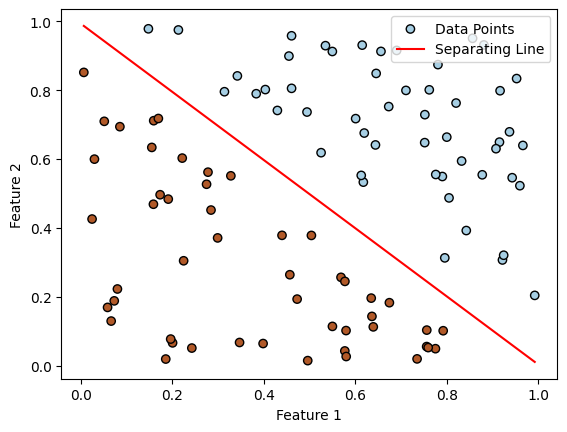

In [35]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint
import matplotlib.pyplot as plt

class LinearSVM:
    def __init__(self, C=1.0):
        self.C = C  # Regularization parameter
        self.coefficients = None

    def fit(self, X, y):
        # Ensure y is a column vector
        y = y.reshape(-1, 1)

        # Lagrangian dual function for SVM
        def lagrangian_neg(alpha):
            u = alpha.sum() - 1/2 * (np.outer(alpha, alpha) * (X @ X.T) * np.outer(y, y)).sum().sum()
            return -u

        # Constraints for SVM
        constraint1 = LinearConstraint(np.eye(len(y)), lb=np.zeros(len(y)))
        constraint2 = LinearConstraint(y.flatten(), lb=0, ub=0)

        # Initial alpha values
        initial_alpha = np.random.random(len(y))

        # Minimize the lagrangian_neg function subject to constraints
        result = minimize(lagrangian_neg, initial_alpha, constraints=(constraint1, constraint2))

        # Extract alpha values
        alpha = result.x

        # Calculate coefficients w and b
        w = np.zeros(X.shape[1])
        for i in np.where(alpha > 1e-7)[0]:
            w += alpha[i] * y[i] * X[i]
        b = y[i] - np.dot(w, X[i])

        # Save the coefficients
        self.coefficients = {'alpha': alpha, 'w': w, 'b': b}

    def predict(self, X):
        return np.sign(np.dot(X, self.coefficients['w']) + self.coefficients['b'])

    def plot_data_and_line(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Paired, edgecolors='k', marker='o', label='Data Points')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        # Plot the separating line
        x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
        y_values = (-self.coefficients['w'][0] * x_values - self.coefficients['b']) / self.coefficients['w'][1]
        plt.plot(x_values, y_values, label='Separating Line', color='r')

        plt.legend()
        plt.show()

# Example usage with the generated datasets
svm = LinearSVM()

# Assuming parameters_list is [(intercept1, slope1), (intercept2, slope2), ...]
for (intercept, slope), (X, y) in zip(parameters_list, datasets):
    X_np = np.array(X)
    y_np = np.array(y)

    # Ensure y is a column vector
    y_np = y_np.reshape(-1, 1)

    # Fit the SVM model
    svm.fit(X_np, y_np)

    print(f"Intercept: {intercept}, Slope: {slope}")
    print("Learned Coefficients:", svm.coefficients)

    # Plot the data and the separating line
    svm.plot_data_and_line(X_np, y_np)
